In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [2]:
#dataset='./training'

In [3]:
# import sklearn.model_selection as model_selection
# from sklearn.model_selection import train_test_split

In [4]:
#train_dat,test_dat = train_test_split(dataset, test_size = 0.3, random_state = 0)

In [5]:
#train_dat

In [6]:
train = ImageDataGenerator(rescale =  1/255)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory("./train",
                                          target_size=(150,150),
                                          batch_size = 64,
                                          class_mode = 'binary')
                                         
test_dataset = test.flow_from_directory("./testing",
                                          target_size=(150,150),
                                          batch_size =64,
                                          class_mode = 'binary')

Found 4405 images belonging to 2 classes.
Found 1470 images belonging to 2 classes.


/Users/vatsalnanda/Desktop/Extras/hackathon-hindi character classification


In [8]:
train_dataset.class_indices



{'Negative': 0, 'Positive': 1}

In [9]:
test_dataset.class_indices

{'Negative': 0, 'Positive': 1}

In [65]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_5 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_6 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)       

In [11]:
model.fit_generator(
        train_dataset,
        steps_per_epoch=2000 // 64,
        epochs=50,
        validation_data=test_dataset,
        validation_steps=800 // 64)
model.save_weights('first_try.h5')  # always save your weights after training or during training

/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
31/31 [==============================] - 27s 575ms/step - loss: 0.9839 - accuracy: 0.6886 - val_loss: 0.4856 - val_accuracy: 0.7552
Epoch 2/50
31/31 [==============================] - 18s 585ms/step - loss: 0.4788 - accuracy: 0.7656 - val_loss: 0.3405 - val_accuracy: 0.8577
Epoch 3/50
31/31 [==============================] - 18s 594ms/step - loss: 0.3966 - accuracy: 0.8258 - val_loss: 0.3037 - val_accuracy: 0.9062
Epoch 4/50
31/31 [==============================] - 17s 541ms/step - loss: 0.3411 - accuracy: 0.8621 - val_loss: 0.2954 - val_accuracy: 0.9047
Epoch 5/50
31/31 [==============================] - 17s 542ms/step - loss: 0.3260 - accuracy: 0.8737 - val_loss: 0.2265 - val_accuracy: 0.9167
Epoch 6/50
31/31 [==============================] - 17s 548ms/step - loss: 0.2572 - accuracy: 0.9063 - val_loss: 0.2141 - val_accuracy: 0.9256
Epoch 7/50
31/31 [==============================] - 17s 552ms/step - loss: 0.2774 - accuracy: 0.9029 - val_loss: 0.1901 - val_accuracy: 0.9323

In [12]:
import random
import json
# from utils.io import write_json

def write_json(filename, result):
    with open(filename, 'w') as outfile:
        json.dump(result, outfile)

def read_json(filename):
    with open(filename, 'r') as outfile:
        data =  json.load(outfile)
    return data

def generate_sample_file(filename):
    res = {}
    for i in range(1,100):
        test_set = str(i) + '.png'
        res[test_set] = 3

    write_json(filename, res)

if __name__ == '__main__':
    generate_sample_file('./sample_result1.json')


In [60]:
from sklearn.metrics import accuracy_score


def predictImage(filename):
    img1 = image.load_img(filename,target_size=(150,150))
    
    plt.imshow(img1)
 
    Y = image.img_to_array(img1)
    
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
   
    print(val)
    if val == 1:
        
        plt.xlabel("Positive",fontsize=30)
        
        
    
    
    elif val == 0:
        
        plt.xlabel("Negative",fontsize=30)
        

[[0.]]


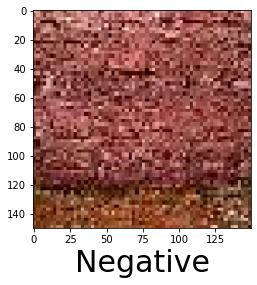

In [61]:
predictImage('./test/98.jpg')

[[0.]]


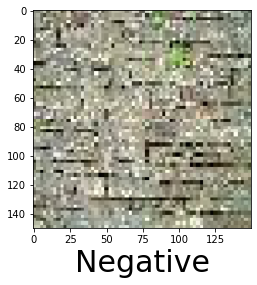

In [26]:
predictImage('./test/97.jpg')

[[0.]]


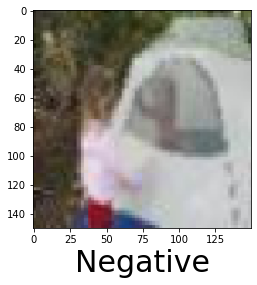

In [27]:
predictImage('./test/87.jpg')

[[0.]]


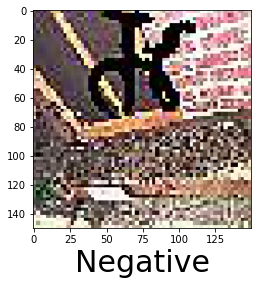

In [28]:
predictImage('./test/13.jpg')

[[0.]]


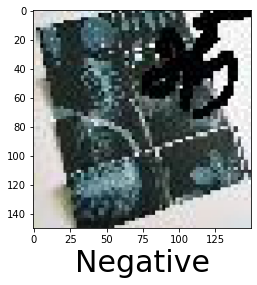

In [29]:
predictImage('./test/28.jpg')

[[0.]]
1
[[0.]]
2
[[0.]]
3
[[0.]]
4
[[1.]]
5
[[0.]]
6
[[0.]]
7
[[0.]]
8
[[0.]]
9
[[0.]]
10
[[0.]]
11
[[0.]]
12
[[0.]]
13
[[0.]]
14
[[0.]]
15
[[0.]]
16
[[0.]]
17
[[0.]]
18
[[0.]]
19
[[0.]]
20
[[0.]]
21
[[0.]]
22
[[0.]]
23
[[0.]]
24
[[0.]]
25
[[1.]]
26
[[0.]]
27
[[0.]]
28
[[0.]]
29
[[1.]]
30
[[0.]]
31
[[0.]]
32
[[0.]]
33
[[0.]]
34
[[0.]]
35
[[0.]]
36
[[0.]]
37
[[0.]]
38
[[0.]]
39
[[0.]]
40
[[0.]]
41
[[0.]]
42
[[0.]]
43
[[0.]]
44
[[0.]]
45
[[1.]]
46
[[0.]]
47
[[1.]]
48
[[0.]]
49
[[0.]]
50
[[0.]]
51
[[1.]]
52
[[1.]]
53
[[0.]]
54
[[0.]]
55
[[0.]]
56
[[0.]]
57
[[0.]]
58
[[0.]]
59
[[0.]]
60
[[0.]]
61
[[0.]]
62
[[0.]]
63
[[0.]]
64
[[0.]]
65
[[0.]]
66
[[1.]]
67
[[0.]]
68
[[1.]]
69
[[8.95773e-29]]
70
[[0.]]
71
[[0.]]
72
[[0.]]
73
[[0.]]
74
[[0.]]
75
[[0.]]
76
[[0.]]
77
[[0.]]
78
[[0.]]
79
[[0.]]
80
[[0.]]
81
[[0.]]
82
[[0.]]
83
[[1.]]
84
[[0.]]
85
[[0.]]
86
[[0.]]
87
[[0.]]
88
[[0.]]
89
[[1.]]
90
[[0.]]
91
[[0.]]
92
[[0.]]
93
[[1.]]
94
[[0.]]
95
[[0.]]
96
[[0.]]
97
[[0.]]
98


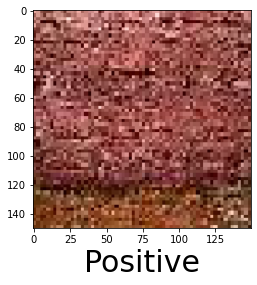

In [23]:
for i in range(1,99):
    predictImage('./test/'+str(i)+'.jpg')
    print(i)

[[1.]]


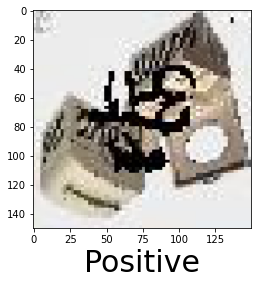

In [30]:
predictImage('./test/26.jpg')

[[1.]]


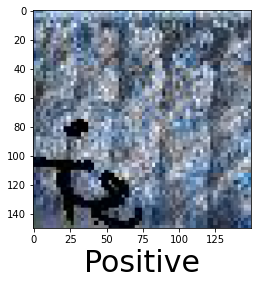

In [31]:
predictImage('./test/46.jpg')

[[1.]]


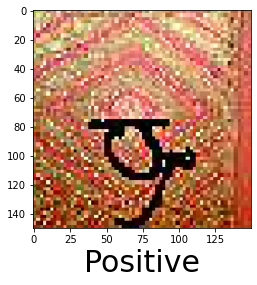

In [32]:
predictImage('./test/52.jpg')

[[1.]]


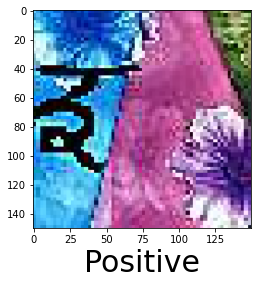

In [33]:
predictImage('./test/53.jpg')

[[1.]]


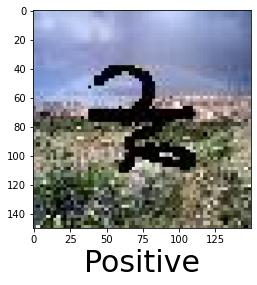

In [34]:
predictImage('./test/67.jpg')

[[1.]]


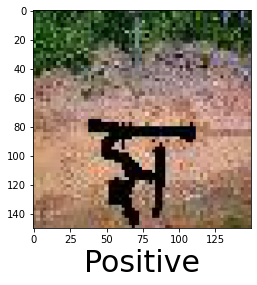

In [36]:
predictImage('./test/69.jpg')

[[8.95773e-29]]


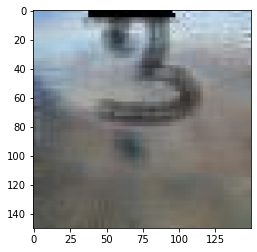

In [37]:
predictImage('./test/70.jpg')

[[1.]]


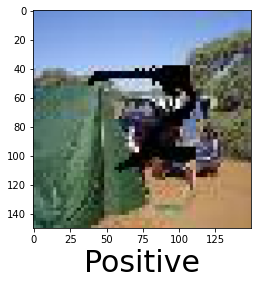

In [38]:
predictImage('./test/84.jpg')

[[1.]]


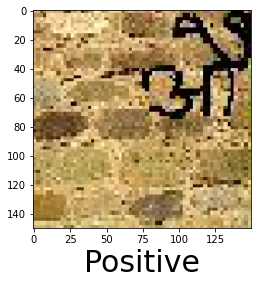

In [39]:
predictImage('./test/90.jpg')

[[1.]]


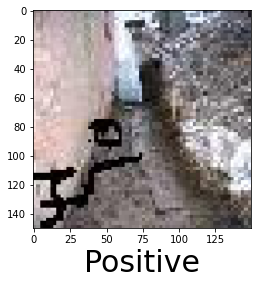

In [40]:
 predictImage('./test/94.jpg')

[[0.]]


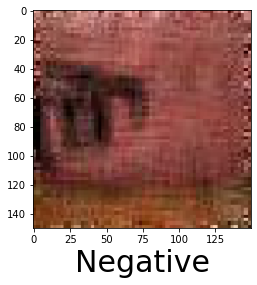

In [41]:
 predictImage('./test/93.jpg')

[[0.]]


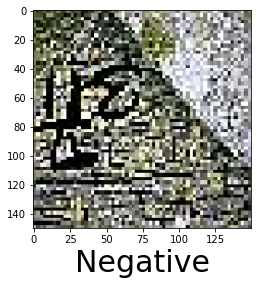

In [42]:
 predictImage('./test/92.jpg')

[[0.]]


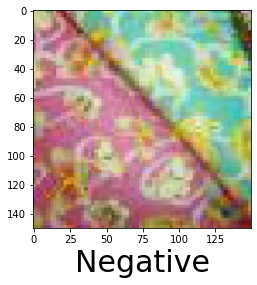

In [43]:
 predictImage('./test/66.jpg')

In [55]:
import pickle

In [63]:
!mkdir -p saved_model
model.save('saved_model/my_model')

INFO:tensorflow:Assets written to: saved_model/my_model/assets


In [64]:
model = tf.keras.models.load_model('saved_model/my_model')

# Check its architecture
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        1

In [66]:
model.save('my_model.h5')


In [67]:
# Recreate the exact same model, including its weights and the optimizer
model = tf.keras.models.load_model('my_model.h5')

# Show the model architecture
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_5 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_6 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)       

In [69]:
loss, acc = model.evaluate(test_dataset, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

23/23 - 3s - loss: 0.6820 - accuracy: 0.7544
Restored model, accuracy: 75.44%
